# Анализ МРТ данных 

In [2]:
import rarfile
import re
import shutil
import os
import glob
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import phik
import networkx as nx

#  Предобработка данных

## Предобработка архива

In [7]:
rar_path = 'данные/TimeCourses.rar'
extract_to = 'данные'
extracted_folder = 'данные/TimeCourses'

# Если папка уже существует, удаляем её
if os.path.exists(extracted_folder):
    shutil.rmtree(extracted_folder)

with rarfile.RarFile(rar_path) as rf:
    rf.extractall(path=extract_to)

print(f"Файлы извлечены в {extract_to}")

BadRarFile: Corrupt file - CRC check failed: TimeCourses/sub-OAS30762/sub-OAS30762_run1_timecourses.mat - exp=2587894035 got=21064832

Составим список названий столбцов, который будем прикреплять к таблицам:

In [11]:
labels_path = "данные/aal_labels.rtf"

with open(labels_path, "r", encoding="utf-8") as file:
    text = file.read()

matches = re.findall(r"(\d+)\s+([\w\d_]+)\s+\1", text)
brain_regions = [match[1] for match in matches]

print([(i+1, brain_regions[i]) for i in range(len(brain_regions))])
print(f"Количество областей мозга: {len(brain_regions)}")

[(1, 'Precentral_L'), (2, 'Precentral_R'), (3, 'Frontal_Sup_2_L'), (4, 'Frontal_Sup_2_R'), (5, 'Frontal_Mid_2_L'), (6, 'Frontal_Mid_2_R'), (7, 'Frontal_Inf_Oper_L'), (8, 'Frontal_Inf_Oper_R'), (9, 'Frontal_Inf_Tri_L'), (10, 'Frontal_Inf_Tri_R'), (11, 'Frontal_Inf_Orb_2_L'), (12, 'Frontal_Inf_Orb_2_R'), (13, 'Rolandic_Oper_L'), (14, 'Rolandic_Oper_R'), (15, 'Supp_Motor_Area_L'), (16, 'Supp_Motor_Area_R'), (17, 'Olfactory_L'), (18, 'Olfactory_R'), (19, 'Frontal_Sup_Medial_L'), (20, 'Frontal_Sup_Medial_R'), (21, 'Frontal_Med_Orb_L'), (22, 'Frontal_Med_Orb_R'), (23, 'Rectus_L'), (24, 'Rectus_R'), (25, 'OFCmed_L'), (26, 'OFCmed_R'), (27, 'OFCant_L'), (28, 'OFCant_R'), (29, 'OFCpost_L'), (30, 'OFCpost_R'), (31, 'OFClat_L'), (32, 'OFClat_R'), (33, 'Insula_L'), (34, 'Insula_R'), (35, 'Cingulate_Mid_L'), (36, 'Cingulate_Mid_R'), (37, 'Cingulate_Post_L'), (38, 'Cingulate_Post_R'), (39, 'Hippocampus_L'), (40, 'Hippocampus_R'), (41, 'ParaHippocampal_L'), (42, 'ParaHippocampal_R'), (43, 'Amygdala_L

## Предобработка данных респондентов

Для каждого человека

1) объединяем 2 файла с временными рядами

2) строим таблицу корреляций и сохраняем ее

In [ ]:
# Корневая директория с папками person_n
root_dir = "данные/TimeCourses"

# Получаем список всех папок вида /data/person_n/
person_dirs = [d for d in sorted(os.listdir(root_dir)) if os.path.isdir(os.path.join(root_dir, d))]

for person in person_dirs:
    person_path = os.path.join(root_dir, person)
    output_file = os.path.join(person_path, "full_data.csv")
    corr_matrix_file = os.path.join(person_path, "correlation_matrix.csv") 

    if os.path.exists(output_file) and os.path.exists(corr_matrix_file):
        print(f"Пропускаем {person}, файлы уже существуют.")
        continue

    # Ищем все CSV-файлы в папке person_n
    csv_files = sorted(glob.glob(os.path.join(person_path, "*.csv")))  # Сортируем по алфавиту
    if not csv_files:
        continue

    # Загружаем и объединяем все CSV-файлы, подписываем слолбцы и сохраняем
    df_list = [pd.read_csv(file, header=None) for file in csv_files]
    df = pd.concat(df_list, ignore_index=True)
    df.columns = brain_regions
    df.to_csv(output_file, index=False)
    print(f"Объединенный файл сохранен: {output_file}") 

    # Строим матрицу корреляций
    corr_matrix = df.corr()
    corr_matrix.to_csv(corr_matrix_file)
    print(f"Матрица корреляций сохранена: {corr_matrix_file}")


Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30001/full_data.csv
Матрица корреляций сохранена: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30001/correlation_matrix.csv
Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30002/full_data.csv
Матрица корреляций сохранена: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30002/correlation_matrix.csv
Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30003/full_data.csv
Матрица корреляций сохранена: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30003/correlation_matrix.csv
Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30004/full_data.csv
Матрица корреляций сохранена: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30004/correlation_matrix.csv
Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/к

## Обработка данных на примере первого респондента - создание графа по матрице корреляций и визуализация промежуточных данных

### Визуализация матрицы корреляций для 1 человека

In [ ]:
#лк-ад версия таблицы

df = pd.read_csv("данные/TimeCourses/sub-OAS30001/correlation_matrix.csv")
ph = df.phik_matrix(njobs=1)

plt.figure(figsize=(166,166))
# sns.heatmap(ph, cmap="Blues", annot=True)
sns.heatmap(ph, cmap="coolwarm", linewidths=0.5)

interval columns not set, guessing: ['Precentral_L', 'Precentral_R', 'Frontal_Sup_2_L', 'Frontal_Sup_2_R', 'Frontal_Mid_2_L', 'Frontal_Mid_2_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_2_L', 'Frontal_Inf_Orb_2_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'OFCmed_L', 'OFCmed_R', 'OFCant_L', 'OFCant_R', 'OFCpost_L', 'OFCpost_R', 'OFClat_L', 'OFClat_R', 'Insula_L', 'Insula_R', 'Cingulate_Mid_L', 'Cingulate_Mid_R', 'Cingulate_Post_L', 'Cingulate_Post_R', 'Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R', 'Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occipital_Inf_R', '

<Axes: >

### Cоздание графа по матрице корреляций

In [14]:
def build_mst_graph(corr_matrix_file, density_target=0.05):
    df_corr = pd.read_csv(corr_matrix_file, index_col=0)
    N = df_corr.shape[0]
    node_labels = list(df_corr.index)

    G = nx.Graph()

    for i in range(N):
        for j in range(i + 1, N):
            w = abs(df_corr.iloc[i, j])
            G.add_edge(node_labels[i], node_labels[j], weight=w)


    # Создаем MST (остовное дерево)
    mst_edges = list(nx.minimum_spanning_edges(G, algorithm="kruskal", data=True))


    # Ограничиваем плотность графа
    E_max = int(density_target * N * (N - 1) / 2)
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
    final_edges = [(u, v, data['weight']) for u, v, data in mst_edges]

    for u, v, data in sorted_edges:
        if len(final_edges) >= E_max:
            break
        final_edges.append((u, v, data['weight']))
    

    G_final = nx.Graph()
    G_final.add_weighted_edges_from(final_edges)

    return G_final

Попробуем другой алгоритм, который сохраняет знак числа (веса ребра), но для самого mst использует модуль

In [61]:
def build_graph(corr_matrix_file, density_target=0.05):
    df_corr = pd.read_csv(corr_matrix_file, index_col=0)
    N = df_corr.shape[0]
    node_labels = list(df_corr.index)

    G = nx.Graph()

    for i in range(N):
        for j in range(i + 1, N):
            w = df_corr.iloc[i, j]
            G.add_edge(node_labels[i], node_labels[j], weight=abs(w), original_weight=w)

    mst_edges = list(nx.minimum_spanning_edges(G, algorithm="kruskal", weight=lambda u, v, d: d['weight'], data=True))

    E_max = int(density_target * N * (N - 1) / 2)
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
    final_edges = [(u, v, data['original_weight']) for u, v, data in mst_edges]

    for u, v, data in sorted_edges:
        if len(final_edges) >= E_max:
            break
        final_edges.append((u, v, data['original_weight']))

    G_final = nx.Graph()
    G_final.add_weighted_edges_from(final_edges)

    return G_final

### Визуализируем граф

In [62]:
graph = build_graph("данные/TimeCourses/sub-OAS30001/correlation_matrix.csv")
print(f"Число рёбер в графе: {graph.number_of_edges()}")
print(f"Названия вершин: {list(graph.nodes)[:5]}")

Число рёбер в графе: 661
Названия вершин: ['Precentral_L', 'Precentral_R', 'Frontal_Sup_2_L', 'Frontal_Sup_2_R', 'Frontal_Mid_2_L']


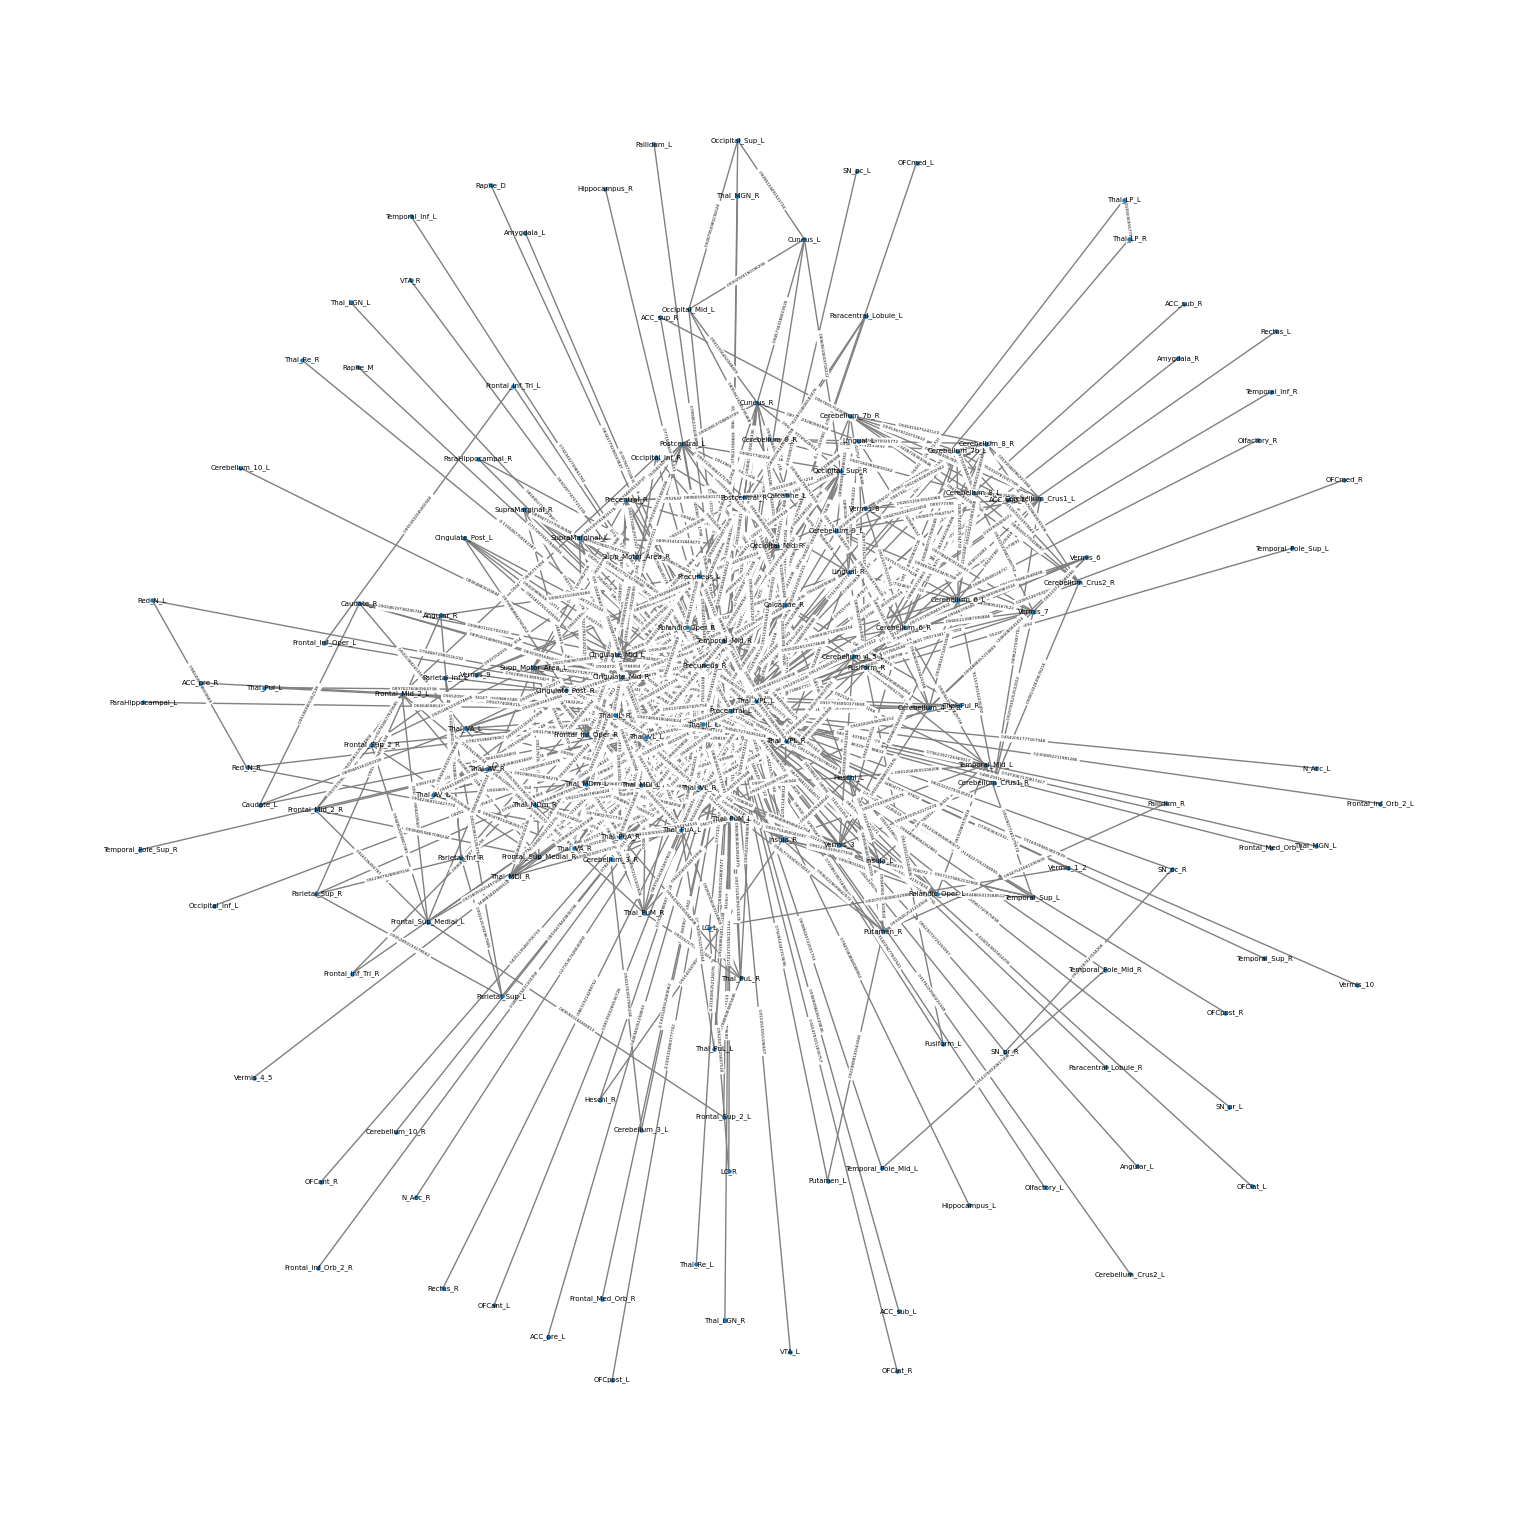

In [63]:
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(graph, weight='weight', k=0.5)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw(graph, pos, with_labels=True, node_size=5, edge_color="gray", font_size=5)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=3)
plt.show()

### Визуализация на мозге:

1. Предобработка атласа AAL-3 (Automated Anatomical Labeling 3):

In [64]:
import nibabel as nib

aal3_img = nib.load("данные/AAL3/AAL3v1.nii.gz") 
aal3_data = aal3_img.get_fdata()

with open("данные/AAL3/AAL3v1.nii.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

aal3_dict = {}
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 3:
        region_id = int(parts[0])
        region_name = " ".join(parts[1:-1])
        aal3_dict[region_id] = region_name

print(list(aal3_dict.items())[:5])

region_coordinates = {}
for region_id, region_name in aal3_dict.items():
    indices = np.argwhere(aal3_data == region_id)
    if len(indices) > 0:
        centroid = np.mean(indices, axis=0)
        region_coordinates[region_name] = centroid

df_coordinates = pd.DataFrame(region_coordinates).T
df_coordinates.columns = ["X", "Y", "Z"]

print(df_coordinates.head())

[(1, 'Precentral_L'), (2, 'Precentral_R'), (3, 'Frontal_Sup_2_L'), (4, 'Frontal_Sup_2_R'), (5, 'Frontal_Mid_2_L')]
                         X          Y          Z
Precentral_L     64.465116  59.519285  60.820193
Precentral_R     24.449571  58.225081  61.404910
Frontal_Sup_2_L  55.083984  80.977618  53.618686
Frontal_Sup_2_R  33.724346  79.596371  54.671869
Frontal_Mid_2_L  62.763479  79.436432  50.968937


2. Связываем координаты областей из внешнего ресурса с нашики областями и визуализируем

In [65]:
# Оставляем только совпадающие области
filtered_coordinates = df_coordinates.loc[df_coordinates.index.intersection(brain_regions)]

print(filtered_coordinates)

                         X          Y          Z
Precentral_L     64.465116  59.519285  60.820193
Precentral_R     24.449571  58.225081  61.404910
Frontal_Sup_2_L  55.083984  80.977618  53.618686
Frontal_Sup_2_R  33.724346  79.596371  54.671869
Frontal_Mid_2_L  62.763479  79.436432  50.968937
...                    ...        ...        ...
Red_N_R          42.034483  53.258621  30.672414
LC_L             47.000000  45.600000  23.000000
LC_R             42.000000  45.400000  22.000000
Raphe_D          44.611111  49.500000  30.777778
Raphe_M          45.000000  47.833333  25.000000

[166 rows x 3 columns]


In [66]:
import plotly.graph_objects as go

x_nodes = filtered_coordinates["X"].values
y_nodes = filtered_coordinates["Y"].values
z_nodes = filtered_coordinates["Z"].values
node_names = filtered_coordinates.index.tolist()

node_trace = go.Scatter3d(
    x=x_nodes, y=y_nodes, z=z_nodes,
    mode='markers+text',
    marker=dict(size=5, color='red'),
    text=node_names
)

edge_traces = []
for edge in graph.edges:
    x0, y0, z0 = filtered_coordinates.loc[edge[0]]
    x1, y1, z1 = filtered_coordinates.loc[edge[1]]
    
    edge_trace = go.Scatter3d(
        x=[x0, x1], y=[y0, y1], z=[z0, z1],
        mode='lines',
        line=dict(width=1, color='blue')
    )
    edge_traces.append(edge_trace)

fig = go.Figure(data=[node_trace] + edge_traces)
fig.update_layout(
    title="3D Brain Connectivity",
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False)
    )
)

fig.show(renderer="browser")

# Кривизны Риччи

### На примере 1 респондента считаем кривизну Формана - Риччи

Для каждой вершины посчитаем дискретную кривизну Риччи

In [20]:
# Функция для вычисления кривизны Формана-Риччи для каждого ребра
def compute_forman_ricci_edges(G):
    ricci_curvatures = {}
    
    for u, v, data in G.edges(data=True):
        w_e = data['weight']
        w_u = len(list(G.neighbors(u)))
        w_v = len(list(G.neighbors(v)))

        sum_neighbors = 0.0
        for e in G.edges(u):
            if e != (u, v):
                sum_neighbors += G[u][e[1]]['weight']  / np.sqrt(w_e * G[u][e[1]]['weight'])
        for e in G.edges(v):
            if e != (u, v):
                sum_neighbors += G[v][e[1]]['weight'] / np.sqrt(w_e * G[v][e[1]]['weight'])

        ricci_curvature = w_e * (w_u / w_e + w_v / w_e - sum_neighbors)
        ricci_curvatures[(u, v)] = ricci_curvature

        if ricci_curvature==None:
            print(u, v, data, w_e, w_u, w_v, sum_neighbors)
    return ricci_curvatures

ricci_curvatures = compute_forman_ricci_edges(graph)
for (u, v), curvature in ricci_curvatures.items():
    graph[u][v]['ricci_curvature'] = curvature

print(ricci_curvatures)

{('Frontal_Inf_Tri_L', 'Olfactory_R'): np.float64(13.991511595849703), ('Frontal_Inf_Tri_L', 'Frontal_Inf_Oper_L'): np.float64(2.914009925727137), ('Olfactory_R', 'ACC_sup_R'): np.float64(13.835292589969692), ('Olfactory_R', 'Frontal_Sup_2_R'): np.float64(20.256018404640088), ('Olfactory_R', 'ACC_pre_L'): np.float64(12.836207125076815), ('Olfactory_R', 'Occipital_Inf_R'): np.float64(16.44649928514328), ('Olfactory_R', 'OFCant_R'): np.float64(13.781121323714375), ('Olfactory_R', 'ACC_sup_L'): np.float64(13.569978952470542), ('Olfactory_R', 'Frontal_Sup_Medial_R'): np.float64(16.86444276119737), ('Olfactory_R', 'Cerebellum_7b_R'): np.float64(18.292875342893), ('Olfactory_R', 'Heschl_R'): np.float64(13.426411738865413), ('Olfactory_R', 'Precentral_L'): np.float64(29.011050610800407), ('Olfactory_R', 'Thal_VL_R'): np.float64(32.45707344766209), ('Frontal_Inf_Orb_2_R', 'Raphe_D'): np.float64(9.972737399967372), ('Frontal_Inf_Orb_2_R', 'Cerebellum_3_L'): np.float64(10.916658072266786), ('Fro

In [21]:
def compute_forman_ricci_nodes(G):
    """
    Вычисляет кривизну Формана-Риччи для каждой вершины как сумму кривизн её инцидентных рёбер.
    """
    ricci_edges = compute_forman_ricci_edges(G)  # Сначала считаем кривизну для рёбер
    ricci_nodes = {node: 0 for node in G.nodes()}  # Инициализируем словарь кривизн вершин

    # Складываем кривизны рёбер для каждой вершины
    for (u, v), ricci in ricci_edges.items():
        ricci_nodes[u] += ricci
        ricci_nodes[v] += ricci

    return ricci_nodes

ricci_nodes = compute_forman_ricci_nodes(graph)
nx.set_node_attributes(graph, ricci_nodes, "ricci_curvature")

print([(node, graph.nodes[node]['ricci_curvature']) for node in graph.nodes()])

[('Frontal_Inf_Tri_L', np.float64(16.90552152157684)), ('Olfactory_R', np.float64(214.76848317828276)), ('Frontal_Inf_Orb_2_R', np.float64(97.68173597352005)), ('Raphe_D', np.float64(13.958186359230522)), ('OFCpost_L', np.float64(915.0629119527349)), ('Thal_AV_R', np.float64(53.23893854230211)), ('Amygdala_L', np.float64(309.57871027467075)), ('Cerebellum_10_L', np.float64(44.466968990981414)), ('Cerebellum_3_L', np.float64(28.632618499906638)), ('OFCmed_L', np.float64(116.78890076901983)), ('Vermis_4_5', np.float64(10.954827370462114)), ('Thal_PuL_L', np.float64(55.32993469074127)), ('ACC_sub_L', np.float64(6.972429860547962)), ('SN_pr_L', np.float64(50.922275131419106)), ('Thal_IL_R', np.float64(147.00337301036552)), ('Pallidum_R', np.float64(11.307761992135834)), ('Vermis_10', np.float64(8.943586729556639)), ('Thal_Re_L', np.float64(110.34932771819992)), ('Thal_MDm_R', np.float64(122.91293719988263)), ('Temporal_Inf_L', np.float64(34.47077218819999)), ('N_Acc_R', np.float64(36.06725

In [22]:
sorted_nodes = sorted(graph.nodes())
ricci_vector = np.array([graph.nodes[node]['ricci_curvature'] for node in sorted_nodes])

print("Всего вершин:", len(sorted_nodes))
print("Отсортированные вершины:", sorted_nodes)
print("Вектор кривизн:", ricci_vector)

Всего вершин: 166
Отсортированные вершины: ['ACC_pre_L', 'ACC_pre_R', 'ACC_sub_L', 'ACC_sub_R', 'ACC_sup_L', 'ACC_sup_R', 'Amygdala_L', 'Amygdala_R', 'Angular_L', 'Angular_R', 'Calcarine_L', 'Calcarine_R', 'Caudate_L', 'Caudate_R', 'Cerebellum_10_L', 'Cerebellum_10_R', 'Cerebellum_3_L', 'Cerebellum_3_R', 'Cerebellum_4_5_L', 'Cerebellum_4_5_R', 'Cerebellum_6_L', 'Cerebellum_6_R', 'Cerebellum_7b_L', 'Cerebellum_7b_R', 'Cerebellum_8_L', 'Cerebellum_8_R', 'Cerebellum_9_L', 'Cerebellum_9_R', 'Cerebellum_Crus1_L', 'Cerebellum_Crus1_R', 'Cerebellum_Crus2_L', 'Cerebellum_Crus2_R', 'Cingulate_Mid_L', 'Cingulate_Mid_R', 'Cingulate_Post_L', 'Cingulate_Post_R', 'Cuneus_L', 'Cuneus_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Orb_2_L', 'Frontal_Inf_Orb_2_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Frontal_Mid_2_L', 'Frontal_Mid_2_R', 'Frontal_Sup_2_L', 'Frontal_Sup_2_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Fusiform_L', 'Fusif

### Создаем класс Person и систематизируем информацию по всем респондентам

В последствии именно в эту ячейку добавляются так же и другие методы и поля для работы с объектами

In [241]:
import scipy.spatial
from scipy.spatial import distance
from enum import Enum

class Metric(Enum):
    MANHATTAN = "manhattan"
    EUCLIDEAN = "euclidean"
    COSINE = "cosine"
    CORRELATION = "correlation"
    CANBERRA = "canberra"
    MINKOWSKI = "minkowski"

class Person:
    """
    Класс для хранения информации о человеке

    :param id: Уникальный идентификатор человека
    :param diagnoses: Список диагнозов (list)
    :param status: Статус (str, ill/healthy)
    :param data_file: Путь к файлу с объединённой информацией (CSV)
    :param corr_matrix_file: Путь к файлу с матрицей корреляций (CSV)
    :param graph: Граф корреляций (объект networkx.Graph)
    :param forman_ricci_vector: Вектор значений кривизны (объект np.array)
    :param cluster_kmeans: Метка кластера для K-Means
    :param cluster_hdbscan: Метка кластера для HDBSCAN
    :param cluster_kmedoids: Метка кластера для K-Medoids
    """
    def __init__(self, person_id, data_file, corr_matrix_file, diagnoses):
        self.id = person_id
        self.diagnoses = diagnoses
        self.status = self.determine_status(diagnoses)
        self.data_file = data_file
        self.corr_matrix_file = corr_matrix_file
        self.graph = self.build_graph(self.corr_matrix_file)
        self.forman_ricci_vector = self.compute_forman_ricci_vector()
        # self.ricci_vectors = {
        #     "forman_ricci": self.compute_forman_ricci_vector(),
        #     "ollivier_ricci": self.compute_ollivier_ricci_vector()
        # }
        self.cluster_kmeans = None
        self.clustering_results = {}

    def determine_status(self, diagnoses):
        if len(diagnoses) > 0:
            return 'ill' 
        else:
            return 'healthy'

    def __compute_forman_ricci_edges(self, G):
        ricci_curvatures = {}
        
        for u, v, data in G.edges(data=True):
            w_e = data['weight']
            w_u = len(list(G.neighbors(u)))
            w_v = len(list(G.neighbors(v)))

            sum_neighbors = 0.0
            for neighbor in G.neighbors(u):
                if neighbor != v:
                    sum_neighbors += G[u][neighbor]['weight'] / np.sqrt(abs(w_e * G[u][neighbor]['weight']))
            for neighbor in G.neighbors(v):
                if neighbor != u:
                    sum_neighbors += G[v][neighbor]['weight'] 

            ricci_curvature = w_e * (w_u / w_e + w_v / w_e - sum_neighbors)
            ricci_curvatures[(u, v)] = ricci_curvature
        
        return ricci_curvatures

    def __compute_forman_ricci_nodes(self, G):
        ricci_edges = self.__compute_forman_ricci_edges(G)
        ricci_nodes = {node: 0 for node in G.nodes()}

        for (u, v), ricci in ricci_edges.items():
            ricci_nodes[u] += ricci
            ricci_nodes[v] += ricci

        return ricci_nodes

    def build_graph(self, corr_matrix_file, density_target=0.05):
        df_corr = pd.read_csv(corr_matrix_file, index_col=0)
        N = df_corr.shape[0]
        node_labels = list(df_corr.index)

        G = nx.Graph()

        for i in range(N):
            for j in range(i + 1, N):
                w = df_corr.iloc[i, j]
                G.add_edge(node_labels[i], node_labels[j], weight=abs(w), original_weight=w)

        mst_edges = list(nx.minimum_spanning_edges(G, algorithm="kruskal", weight=lambda u, v, d: d['weight'], data=True))

        E_max = int(density_target * N * (N - 1) / 2)
        sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
        final_edges = [(u, v, data['original_weight']) for u, v, data in mst_edges]

        for u, v, data in sorted_edges:
            if len(final_edges) >= E_max:
                break
            final_edges.append((u, v, data['original_weight']))

        G_final = nx.Graph()
        G_final.add_weighted_edges_from(final_edges)

        forman_ricci_curvatures = self.__compute_forman_ricci_edges(G_final)
        for (u, v), curvature in forman_ricci_curvatures.items():
            G_final[u][v]['forman_ricci_curvature'] = curvature
        ricci_nodes = self.__compute_forman_ricci_nodes(G_final)
        nx.set_node_attributes(G_final, ricci_nodes, "forman_ricci_curvature")

        return G_final

    def compute_forman_ricci_vector(self):
        sorted_nodes = sorted(self.graph.nodes())
        return np.array([self.graph.nodes[node]['forman_ricci_curvature'] for node in sorted_nodes])
 
    def distance_to(self, other, curvature="forman_ricci", metric=Metric.MANHATTAN):
        """
        Вычисляет расстояние между векторами кривизн двух людей.

        :param other: Другой объект Person
        :param metric: Метрика расстояния
        :return: Число (расстояние)
        """
        if curvature == "forman_ricci":
            x, y = self.forman_ricci_vector, other.forman_ricci_vector
        
        if metric == "manhattan":
            # Манхэттенское расстояние (L1-норма)
            return distance.cityblock(x, y)
        if metric == "euclidean":
            # Евклидово расстояние (L2-норма)
            return distance.euclidean(x, y)
        elif metric == "cosine":
            # Косинусное расстояние
            return distance.cosine(x, y)
        elif metric == "correlation":
            # Корреляционное расстояние (1 - коэффициент Пирсона)
            return 1 - np.corrcoef(x, y)[0, 1]
        elif metric == "canberra":
            # Варьированное расстояние (Canberra)
            return distance.canberra(x, y)
        elif metric == "minkowski":
            # Вессерово расстояние (обобщение L1 и L2, здесь p=3)
            return distance.minkowski(x, y, p=3)
        else:
            raise ValueError(f"Метрика {metric} не существует. Выберите одну из: {', '.join([m.value for m in Metric])}")

    def __repr__(self):
        return f"Subject: id={self.id}, status={self.status}, nodes={len(self.graph.nodes)}, edges={len(self.graph.edges)}"


Преподготовка для добавления к данным людей их диагнозов

In [166]:
import openpyxl

df_diagnoses = pd.read_excel('данные/diagnosis_filtered.xlsx')

diagnoses_dict = {}
for _, row in df_diagnoses.iterrows():
    person_id = row['OASISID']
    diagnoses = []
    if row['DEMENTED'] == 1:
        diagnoses.append('DEMENTED')
    if row['MCIAMEM-IMPNOMCI'] == 1:
        diagnoses.append('MCIAMEM-IMPNOMCI')
    if row['PROBAD-POSSADIF'] == 1:
        diagnoses.append('PROBAD-POSSADIF')
    diagnoses_dict[person_id] = diagnoses

Теперь пробежимся по всем людям и вычислим все нужные нам данные для каждого

In [167]:
from pathlib import Path

data_dir = Path("данные/TimeCourses")

persons = []
incorrect = []
incorrect_count = 0

for idx, person_folder in enumerate(sorted(data_dir.iterdir())):
    corr_matrix_file = person_folder / "correlation_matrix.csv"
    full_data_file = person_folder / "full_data.csv"

    if corr_matrix_file.exists() and full_data_file.exists():
        df_full = pd.read_csv(full_data_file, header=None)
        if df_full.shape[0] > 1 and pd.isna(df_full.iloc[1, 0]) or str(df_full.iloc[1, 0]).strip() in {"0", "0.0"}:
                incorrect_count += 1
                incorrect.append((idx, person_folder))
                continue

        person_id = person_folder.name.lstrip("sub-")
        diagnoses = diagnoses_dict.get(person_id, [])

        new_person = Person(
            person_id=person_id,
            data_file=str(full_data_file),
            corr_matrix_file=str(corr_matrix_file),
            diagnoses=diagnoses
        )
        persons.append(new_person)
    else:
        print(f"Для человека {person_folder} не существует одного из необходимых файлов")  

print(f"Создано {len(persons)} объектов Person")
for p in persons[:10]:
    print(p)
print()
print(f"Количество людей: информация о которых некорректна: {incorrect_count}")
print("Перечисление \"некоректных\" людей:")
[print(pers) for pers in incorrect]


Создано 398 объектов Person
Subject: id=OAS30001, status=healthy, nodes=166, edges=661
Subject: id=OAS30002, status=healthy, nodes=166, edges=682
Subject: id=OAS30003, status=healthy, nodes=166, edges=662
Subject: id=OAS30004, status=healthy, nodes=166, edges=649
Subject: id=OAS30005, status=healthy, nodes=166, edges=678
Subject: id=OAS30006, status=healthy, nodes=166, edges=679
Subject: id=OAS30007, status=healthy, nodes=166, edges=684
Subject: id=OAS30009, status=healthy, nodes=166, edges=678
Subject: id=OAS30011, status=healthy, nodes=166, edges=684
Subject: id=OAS30013, status=ill, nodes=166, edges=678

Количество людей: информация о которых некорректна: 6
Перечисление "некоректных" людей:
(19, PosixPath('данные/TimeCourses/sub-OAS30033'))
(95, PosixPath('данные/TimeCourses/sub-OAS30205'))
(195, PosixPath('данные/TimeCourses/sub-OAS30370'))
(254, PosixPath('данные/TimeCourses/sub-OAS30477'))
(330, PosixPath('данные/TimeCourses/sub-OAS30618'))
(382, PosixPath('данные/TimeCourses/sub

[None, None, None, None, None, None]

### Метрики

Мы разобрались с "объектами" людей и с векторами кривизн, теперь разберемся с метриками. 

Во-первых, я добавила новый метод обсчета расстояний между векторами в зависимости от выбранной метрики в класс Person

Теперь для каждой метрики нужно рассчитать матрицу расстояний (по всем людям). Позже мы добавим и другие кривизны, поэтому матриц будет еще больше. Для этого создадим структуру для хранения всех этих матриц

In [171]:
distance_matrices = {
    # ('forman-ricci', Metric.EUCLIDEAN): np.array(...),  # Матрица для кривизны "forman-ricci" и метрики "euclidean"
    # ('forman-ricci', Metric.MANHATTAN): np.array(...),  # Матрица для кривизны "forman-ricci" и метрики "manhattan"
    # ('olivie-ricci', Metric.EUCLIDEAN): np.array(...),  # Матрица для другой кривизны и метрики "euclidean"
    # ...
}

In [172]:
def compute_distance_matrices(persons, curvatures, metrics):
    distance_matrices = {}

    for curvature in curvatures:
        for metric in metrics:
            N = len(persons)
            distance_matrix = np.zeros((N, N))
            for i in range(N):
                for j in range(i + 1, N):
                    dist = persons[i].distance_to(persons[j], curvature=curvature, metric=metric)
                    distance_matrix[i, j] = dist
                    distance_matrix[j, i] = dist 

            distance_matrices[(curvature, metric)] = distance_matrix

    return distance_matrices

In [174]:
curvatures = ['forman_ricci']
metrics = ["manhattan", "euclidean", "cosine", "correlation", "canberra"]
distance_matrices = compute_distance_matrices(persons, curvatures, metrics)

Визуализируем полученные данные

In [175]:
person_labels = [person.id for person in persons]  # Или другой удобный идентификатор

# for (curvature, metric), matrix in distance_matrices.items():
#     df = pd.DataFrame(matrix, index=person_labels, columns=person_labels)

#     plt.figure(figsize=(180, 180))
#     sns.heatmap(df, cmap="coolwarm", linewidths=0.5)
#     plt.title(f"Матрица расстояний ({curvature}, {metric})", fontsize=14, pad=20)
#     plt.xlabel("Person")
#     plt.ylabel("Person")
#     plt.show()

### Кластеризация

#### K-means

In [226]:
from sklearn.cluster import KMeans

def cluster_kmeans(persons, n_clusters=2, curvature="forman_ricci"):

    vectors = np.array([getattr(p, f"{curvature}_vector") for p in persons])

    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(vectors)

    for person, label in zip(persons, labels):
        person.clustering_results[(curvature, None, 'kmeans')] = label

    return labels

labels_kmeans = cluster_kmeans(persons, n_clusters=2)
print(labels_kmeans)

[1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1
 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0
 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0
 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1]


#### K-Medoids

In [227]:
from sklearn_extra.cluster import KMedoids

def cluster_kmedoids(persons, distance_matrices, 
                     curvature="forman_ricci", metric=Metric.MANHATTAN, n_clusters=2):

    model = KMedoids(n_clusters=n_clusters, metric="precomputed", random_state=42)
    labels = model.fit_predict(distance_matrices.get((curvature, metric.value)))

    for person, label in zip(persons, labels):
        person.clustering_results[(curvature, metric.value, 'kmedoids')] = label

    return labels

labels_kmedoids = cluster_kmedoids(persons, distance_matrices)
print(labels_kmedoids)

[1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0
 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0
 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1
 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0]


#### HDBSCAN

In [228]:
import hdbscan

def cluster_hdbscan(persons, distance_matrices, 
                     curvature="forman_ricci", metric=Metric.MANHATTAN, min_cluster_size=3):
    
    model = hdbscan.HDBSCAN(metric="precomputed", min_cluster_size=min_cluster_size)
    labels = model.fit_predict(distance_matrices.get((curvature, metric.value)))

    for person, label in zip(persons, labels):
        person.clustering_results[(curvature, metric.value, 'hdbscan')] = label

    return labels

labels_hdbscan = cluster_hdbscan(persons, distance_matrices)
print(labels_hdbscan)

[ 0 -1 -1 -1  0  0 -1 -1 -1  0  0  0 -1  0  0  0  0  0  0 -1 -1  0  0 -1
  0  0 -1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1  0 -1  0 -1 -1 -1  0
 -1  0 -1  0 -1  0  0  0  0  0  0 -1  0  0 -1 -1  0 -1  0 -1 -1 -1  0 -1
 -1  0  0 -1  0 -1  0 -1 -1 -1  0  0  0  1  1  0  0 -1 -1  0  0  0 -1 -1
  0  0 -1  0  0  0  0 -1  0  0 -1  0 -1 -1 -1  0  0 -1 -1  0 -1  0  0 -1
 -1  0  0  0  0  0 -1  0 -1  0 -1 -1 -1 -1 -1  0  0 -1  0  0  0 -1  0  0
 -1  0 -1 -1  0 -1  0  0  0 -1  0 -1  0  0 -1  0 -1  0  0  0 -1 -1  1 -1
 -1  0 -1  0 -1 -1  0  0 -1  0  0  0 -1 -1 -1 -1  1 -1  0  0 -1  0 -1 -1
 -1 -1 -1  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0 -1 -1  0  0  0 -1  0
  0 -1 -1  0 -1  0 -1 -1 -1 -1  0 -1 -1  0 -1 -1  0  0  0 -1 -1  0  0 -1
  0 -1 -1  0  0  0  0 -1 -1  0 -1  0  0  0 -1  0 -1 -1 -1  0  0  0 -1  0
 -1  0 -1 -1 -1  0  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1  0  0  0  0 -1 -1
 -1 -1  0 -1 -1  0 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1  0 -1  0  0  0 -1 -1
 -1 -1 -1 -1 -1  0  0  0  0  0  0  0 -1 -1 -1 -1  0

#### Объединим все методы кластеризации в одну функцию

In [256]:
def cluster_data(persons, distance_matrices, method="kmeans", 
                 n_clusters=2, curvature="forman_ricci", metric=Metric.MANHATTAN, 
                 min_cluster_size=3):
    """
    Кластеризация данных по выбранному методу.
    
    :param persons: список объектов Person
    :param distance_matrices: матрицы попарных расстояний
    :param method: метод кластеризации ('kmeans', 'kmedoids', 'hdbscan')
    :param n_clusters: число кластеров (для KMeans и KMedoids)
    :param curvature: тип кривизны для векторизации
    :param metric: метрика расстояния (например, Metric.MANHATTAN)
    :param min_cluster_size: минимальный размер кластера (для HDBSCAN)
    :return: список меток кластеров
    """
    if method == "kmeans":
        vectors = np.array([getattr(p, f"{curvature}_vector") for p in persons])
        model = KMeans(n_clusters=n_clusters, random_state=42)
        labels = model.fit_predict(vectors)

    elif method == "kmedoids":
        model = KMedoids(n_clusters=n_clusters, metric="precomputed", random_state=42)
        labels = model.fit_predict(distance_matrices.get((curvature, metric.value)))

    elif method == "hdbscan":
        model = hdbscan.HDBSCAN(metric="precomputed", min_cluster_size=min_cluster_size)
        labels = model.fit_predict(distance_matrices.get((curvature, metric.value)))
    
    else:
        raise ValueError("Неподдерживаемый метод кластеризации. Выберите один из этих: 'kmeans', 'kmedoids', 'hdbscan'.")

    for person, label in zip(persons, labels):
        if method == "kmeans":
           person.clustering_results[(curvature, None, method)] = label 
        else:
            person.clustering_results[(curvature, metric.value, method)] = label

    return labels

Оценка результатов

In [255]:
def evaluate_clustering(persons, clustering_method, curvature="forman_ricci", metric=Metric.MANHATTAN, clustering_level='simple'):
    if clustering_level=='simple':
        true_labels = np.array([1 if p.status == "ill" else 0 for p in persons])
    else:
        pass # здесь будет рассмотрен случай кластеризации по конкретным диагнозам

    if clustering_method=='kmeans':
        predicted_labels = np.array([p.cluster_kmeans for p in persons])
    elif clustering_method=='kmedoids':
        predicted_labels = np.array([p.clustering_results[(curvature, metric.value, "kmedoids")] for p in persons])
    else:
        predicted_labels = np.array([p.clustering_results[(curvature, metric.value, "hdbscan")] for p in persons])  

    cm = confusion_matrix(true_labels, predicted_labels)
    
    # print("=" * 50)
    # print(f"Кластеризация методом: {clustering_method.upper()}")
    # print(f"Тип кривизны: {curvature}")
    # if clustering_method != 'kmeans':
    #     print(f"Метрика расстояния: {metric.value}")
    # print("-" * 50)
    print("Матрица ошибок:")
    print(cm)
    print("=" * 50)

Теперь посмотрим, что у нас вырисовывается

In [285]:
curvatures = ["forman_ricci"]
metrics = list(Metric)[:-1]
clustering_methods = ["kmeans", "kmedoids", "hdbscan"]

for method in clustering_methods:
    for curvature in curvatures:
        metrics_list = [None] if method == "kmeans" else metrics  # KMeans не использует метрики расстояния

        for metric in metrics_list:
            cluster_data(persons, distance_matrices, method=method, curvature=curvature, metric=metric)
            metric_value = metric.value if metric else None
            print(f"Оценка для {method}, метрика {metric_value}, кривизна {curvature}")
            evaluate_clustering(persons, method, curvature=curvature, metric=metric)

Оценка для kmeans, метрика None, кривизна forman_ricci
Матрица ошибок:
[[111 215]
 [ 13  59]]
Оценка для kmedoids, метрика manhattan, кривизна forman_ricci
Матрица ошибок:
[[188 138]
 [ 39  33]]
Оценка для kmedoids, метрика euclidean, кривизна forman_ricci
Матрица ошибок:
[[169 157]
 [ 34  38]]
Оценка для kmedoids, метрика cosine, кривизна forman_ricci
Матрица ошибок:
[[173 153]
 [ 38  34]]
Оценка для kmedoids, метрика correlation, кривизна forman_ricci
Матрица ошибок:
[[160 166]
 [ 42  30]]
Оценка для kmedoids, метрика canberra, кривизна forman_ricci
Матрица ошибок:
[[169 157]
 [ 38  34]]
Оценка для hdbscan, метрика manhattan, кривизна forman_ricci
Матрица ошибок:
[[  0   0   0]
 [161 162   3]
 [ 27  44   1]]
Оценка для hdbscan, метрика euclidean, кривизна forman_ricci
Матрица ошибок:
[[  0   0   0   0   0]
 [ 49   3   4 265   5]
 [  8   0   0  64   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
Оценка для hdbscan, метрика cosine, кривизна forman_ricci
Матрица ошибок:
[[  0   0   0